# TP 1 - Visión por Computadora 1 | Parte 1

## Enunciado:

### Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

*** 

### Funciones y variables globales

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def get_image(path, get_rgb=True):
    img = cv.imread(path, cv.IMREAD_COLOR)
    if get_rgb:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [3]:
def plot_results(nrows, ncols, images, transformed_images, image_paths, figsize=(15, 25)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)    
    for i, (original, transformed) in enumerate(zip(images, transformed_images)):
        axes[i][0].set_title(f"Original - {image_paths[i]}")
        axes[i][0].imshow(original)
        axes[i][1].set_title(f"Transformed - {image_paths[i]}")
        axes[i][1].imshow(transformed)
    fig.tight_layout()

## Parte 1

### 1.1. Algoritmo de pasaje a coordenadas cromáticas:

#### 1.1.1. Implementación del algoritmo de coordenadas cromáticas

In [4]:
def chromatic_coordinates(image, gamma=0.01):
    im_r, im_g, im_b = cv.split(image)
    
    denominator = (gamma * im_r + gamma * im_g + gamma * im_b)
    
    im_r = np.divide((gamma * im_r), denominator, where=denominator!=0)
    im_g = np.divide((gamma * im_g), denominator, where=denominator!=0)
    im_b = np.divide((gamma * im_b), denominator, where=denominator!=0)
  
    result = cv.merge((im_r, im_g, im_b))
    
    return result

#### 1.1.2. Verificación del funcionamiento del algoritmo

- Cargamos las imágenes para las pruebas, y las transformamos utilizando el algoritmo

In [5]:
image_cc_paths = ['coord_cromaticas/CoordCrom_1.png',
                  'coord_cromaticas/CoordCrom_2.png',
                  'coord_cromaticas/CoordCrom_3.png',]

images_cc = [get_image(path) for path in image_cc_paths]
transformed_cc_images = [chromatic_coordinates(img) for img in images_cc]

- Visualizamos las imágenes originales y las transformadas:

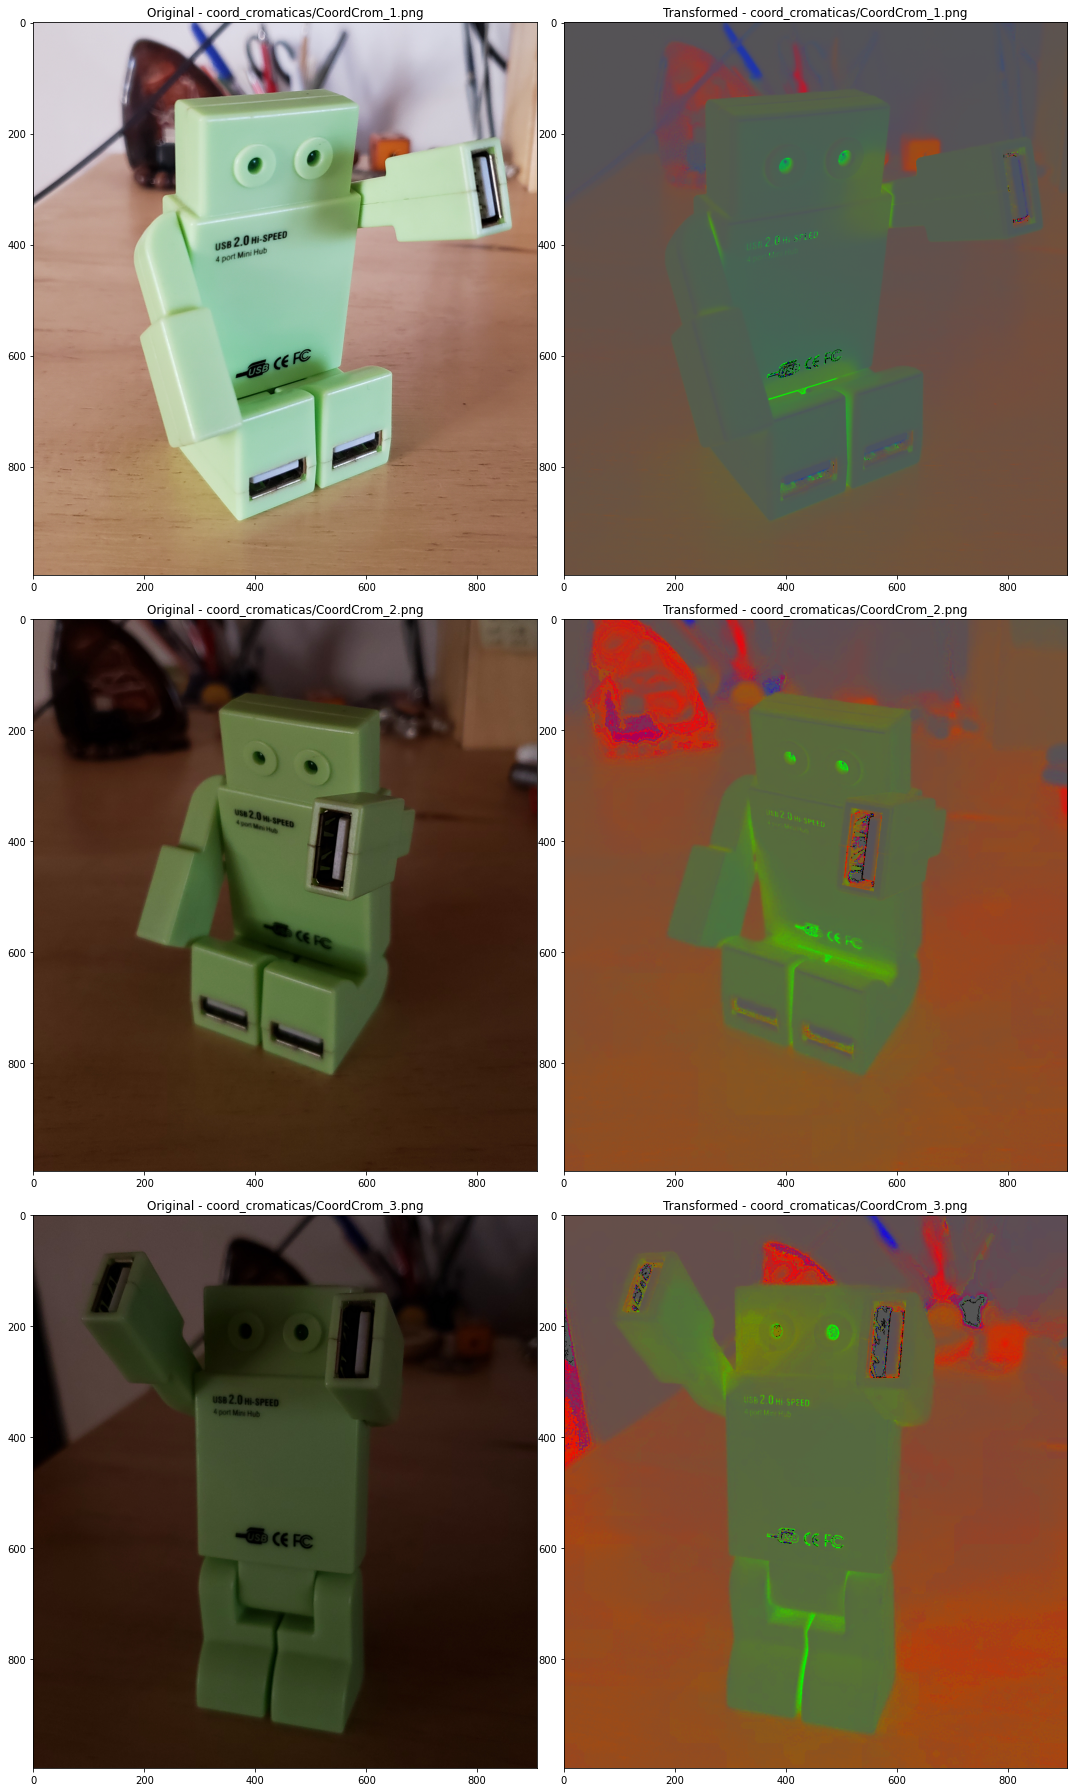

In [6]:
plot_results(nrows=len(image_cc_paths),
             ncols=2,
             images=images_cc,
             transformed_images=transformed_cc_images,
             image_paths=image_cc_paths)

## Parte 2

### 2.1. Algoritmo White Patch:

#### 2.1.1. Implementación del algoritmo de White Patch

In [7]:
def white_patch(image):
    im_r, im_g, im_b = cv.split(image)
    w_max = 255
    r_max, g_max, b_max = im_r.max(), im_g.max(), im_b .max()
    
    im_r = im_r * np.divide(w_max, r_max, where=r_max!=0)
    im_g = im_g * np.divide(w_max, g_max, where=g_max!=0)
    im_b = im_b * np.divide(w_max, b_max, where=b_max!=0)
  
    result = cv.merge((im_r, im_g, im_b))
    
    return result.astype('uint8')

#### 2.1.2. Verificación del funcionamiento del algoritmo

- Cargamos las imágenes para las pruebas, y las transformamos utilizando el algoritmo

In [8]:
image_wp_paths = ['white_patch/test_blue.png',
                  'white_patch/test_green.png',
                  'white_patch/test_red.png',
                  'white_patch/wp_blue.jpg',
                  'white_patch/wp_green.png',
                  'white_patch/wp_green3.jpg',
                  'white_patch/wp_no_white.png',
                  'white_patch/wp_red.png',
                  'white_patch/wp_red2.jpg',]

images_wp = [get_image(path) for path in image_wp_paths]
transformed_wp_images = [white_patch(img) for img in images_wp]

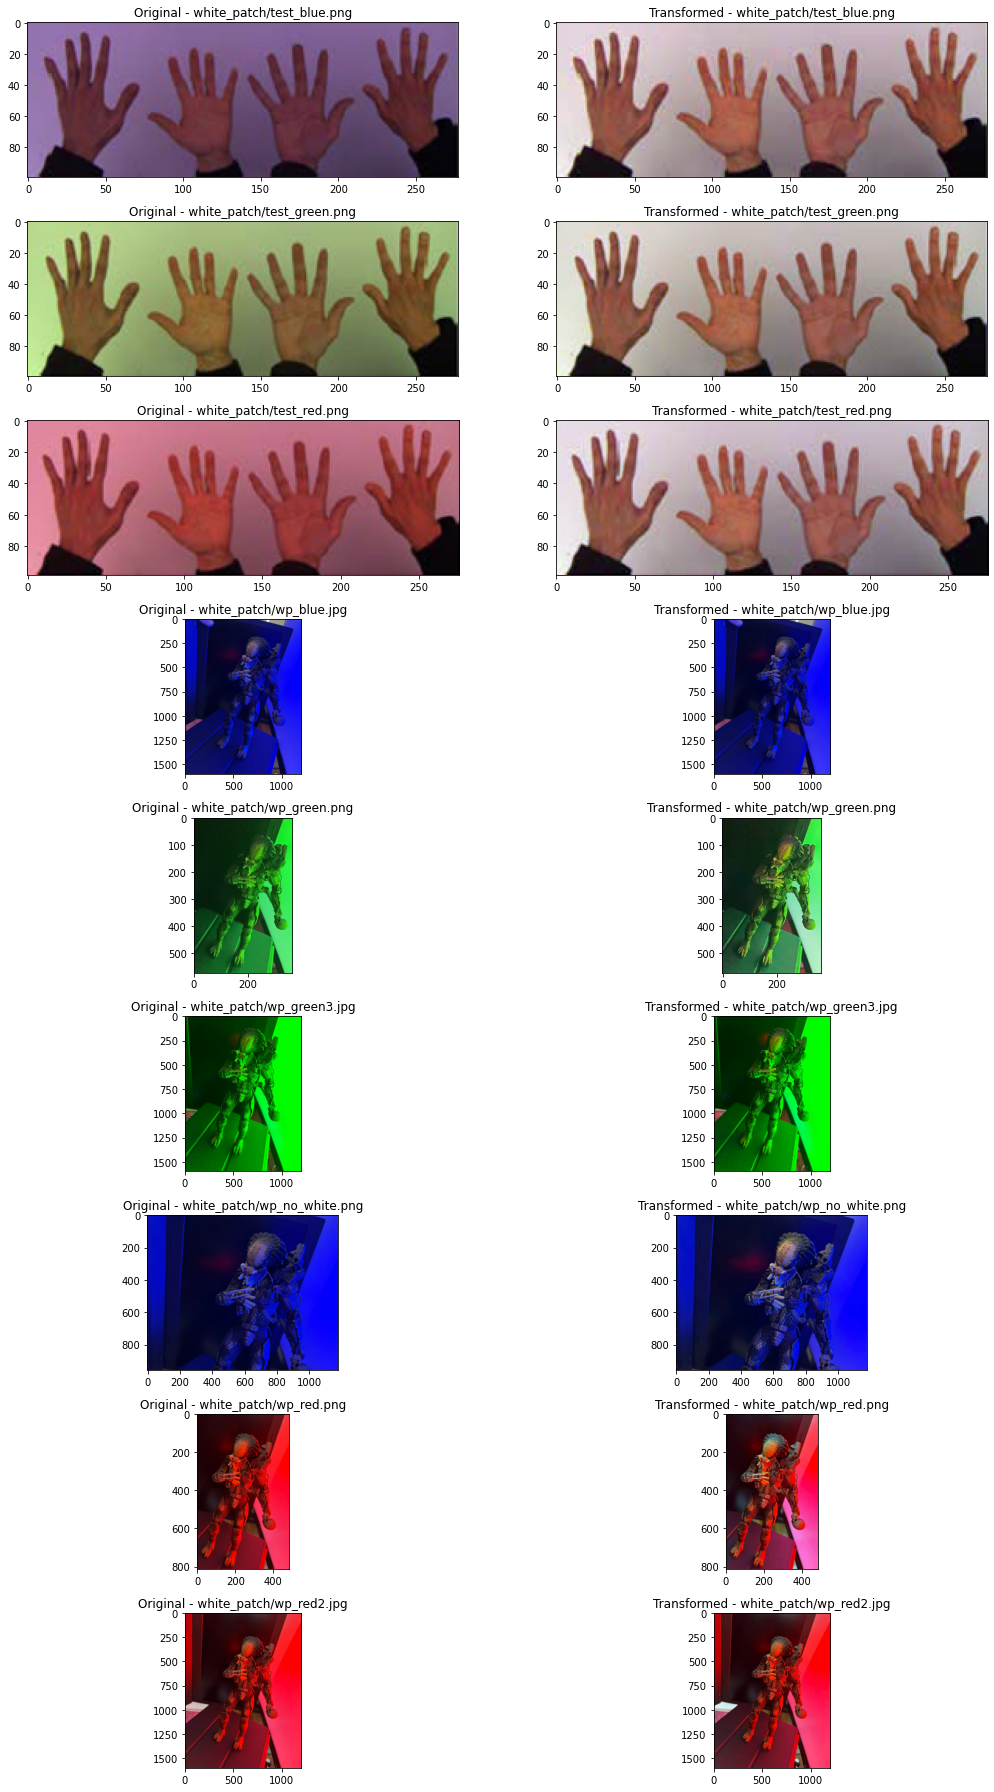

In [9]:
plot_results(nrows=len(image_wp_paths),
             ncols=2,
             images=images_wp,
             transformed_images=transformed_wp_images,
             image_paths=image_wp_paths)

### Conclusiones - White Patch:

- Es posible notar el buen funcionamiento del algoritmo white patch para librarnos de las diferencias de color de iluminación en los casos en los que no se encuentran presentes píxeles blancos (R=255, G=255, B=255), no obstante, ante la aparición de píxeles de este color, el algoritmo no modifica la imagen original. Este fenómeno se hace notorio en las imágenes: 'white_patch/wp_blue.jpg' y 'white_patch/wp_red2.jpg'